# Sentiment Analysis: Large Movie Review Dataset

Hi again! You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project is related to NLP. As you may already know, the most important and hardest part of an NLP project is pre-processing, which is why we are going to focus on that.

### Getting the data

To access the data for this project, you only need to execute the code below. This will download three files:

- `movies_review_train_aai.csv`: Training dataset you must use to train and find the best hyperparameters on your model.

- `movies_review_test_aai.csv`: Test dataset to test your model.

Basically a basic sentiment analysis problem, as in this case, consists of a classification problem, where the possible output labels are: `positive` and `negative`. Which indicates, if the review of a movie speaks positively or negatively. In our case it is a binary problem, but one could have many more "feelings" tagged and thus allow a more granular analysis.

### These are the objectives of the project:

* Read data that is not in a traditional format.
* Put together a set of preprocessing functions that we can use later on any NLP or related problems.
* Vectorize the data in order to apply a machine learning model to it: using BoW or TF-IDF.
* BoW and TF-IDF are classic ways to vectorize text, but currently we have some more complex ways with better performance, for this we are going to train our own word embedding and use it as a vectorization source for our data.
* Train a sentiment analysis model that allows us to detect positive and negative opinions in movie reviews.

---
## 1. Get the data

**Download the data by executing the code below:**

`Notes:` Use the target column as `positive`, that way the positive value will be indicated with a value of `1` and negative with a value of `0`. In this case, a split train/test is not necessary because the original data is already separated.

In [1]:
from src import config, data_utils

import os
from pathlib import Path
import sys

import numpy as np
from gensim.models import Word2Vec
import nltk

sys.path.append(os.path.dirname(os.getcwd()))

from src import word2vec, evaluation, text_normalizer

np.random.seed(42)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/agvargasb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/agvargasb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
train, test = data_utils.get_datasets()

In [3]:
# TODO Complete in this cell: Complete the function `split_data()` but not here in
# the notebook, do it in the python module called `data_utils.py`.
# Then make sure this code runs without errors.

X_train, y_train, X_test, y_test = data_utils.split_data(train, test)

In [4]:
del train
del test

In [5]:
X_train[0:5]

0    The power to dream is a wonderful thing. There...
1    Back when Alec Baldwin and Kim Basinger were a...
2    Dark Angel is a futuristic sci-fi series, set ...
3    This God forsaken film is about three dumb mil...
4    I can't believe I am so angry after seeing thi...
Name: review, dtype: object

In [37]:
y_test.value_counts()

positive
1    12500
0    12500
Name: count, dtype: int64

---
## 2. Normalize the data

**Create the following functions but not here in the notebook, do it in the python script called `text_normalizer.py` and import them into the notebook (this way you can build your own NLP preprocessing library). In fact, the structure of the functions is already written, you must complete them with the code that you consider necessary.**

- `remove_html_tags(text):` to remove all HTML tags that may be present in text.
- `remove_accented_chars(text):` to remove accented characters from text
- `expand_contractions(text):` to expand contractions of the type, "don't" to "do not". The contractions are already defined in the "contractions.py" file.
- `lemmatize_text(text):` to lemmatize text.
- `stem_text(text):` to apply stemming (NLTK's PorterStemmer) on text.
- `remove_special_chars(text):` to remove special characters from text.
- `remove_special_chars(text, remove_digits=True):` to remove numbers, note that it is the same function to remove special characters with the addition of an argument that enables or disables the removal of numbers.
- `remove_stopwords(text, stopwords=stop_words):` to remove stopwords from text.
- `remove_extra_new_lines(text):` to remove extra newlines from text.
- `remove_extra_whitespace(text):` to remove extra whitespaces from text.

If you want to add more features that would be great, for example you could start by removing emojis, using different stemming algorithms, etc. The more functions you have the better, remember that the texts are very varied and the preprocessing depends a lot on the source of our data.

To apply each of the functions you created and pre-process the dataset, you must use the `normalize_corpus()` function of the `text_normalizer.py` script. In this method each of the functions you wrote is called, in fact you must enable or disable what you consider necessary (at this point we leave it to your free choice, for example, you can lemmatize or apply stemming or directly not apply any of the two and so on with the rest, but that is your choice), this function simply groups the previous ones for a more simplified use.

In [5]:
# TODO: Complete all the functions with the `TODO` comment inside the
# module `text_normalizer.py`. Then make sure this code runs without errors.
# You can change the parameters for `normalize_corpus()` if you want.

norm_train_reviews = text_normalizer.normalize_corpus(X_train)
norm_test_reviews = text_normalizer.normalize_corpus(X_test)

/home/agvargasb/Documents/Anyone_AI/Sprint_5/src/text_normalizer.py:40: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Progress: 10.0%
Progress: 20.0%
Progress: 30.0%
Progress: 40.0%
Progress: 50.0%
Progress: 60.0%
Progress: 70.0%
Progress: 80.0%
Progress: 90.0%
Progress: 100.0%
Done!
Progress: 10.0%
Progress: 20.0%
Progress: 30.0%
Progress: 40.0%
Progress: 50.0%
Progress: 60.0%
Progress: 70.0%
Progress: 80.0%
Progress: 90.0%
Progress: 100.0%
Done!


In [11]:
# import pandas as pd
# import sqlite3

# conn = sqlite3.connect('dataset/sprint_5.db')

# pd.Series(norm_train_reviews).to_sql('X_train', conn, if_exists='replace', method='multi')
# pd.Series(norm_test_reviews).to_sql('X_test', conn, if_exists='replace', method='multi')

25000

In [7]:
del X_train
del X_test

In [2]:
norm_train_path = str(Path(config.DATASET_ROOT_PATH) / "norm_train_reviews.txt")
norm_test_path = str(Path(config.DATASET_ROOT_PATH) / "norm_test_reviews.txt")

In [10]:
# TODO Create a new plain text file called `norm_train_reviews.txt` and put the
# `norm_train_reviews` in it. Each review should be on a separate line.

if not os.path.exists(norm_train_path):
    with open(norm_train_path, 'w') as f:
        for review in norm_train_reviews:
            f.write(review + '\n')

if not os.path.exists(norm_test_path):
    with open(norm_test_path, 'w') as f:
        for review in norm_test_reviews:
            f.write(review + '\n')

**The next cell is used to load the normalized data, so there is no need to re-run the normalization unless you have made changes to text_normalizer.py.**

In [8]:
with open(norm_train_path, 'r') as file:
    norm_train_reviews = file.read().splitlines()

with open(norm_test_path, 'r') as file:
    norm_test_reviews = file.read().splitlines()

In [42]:
norm_train_reviews[0:5]

['power dream wonderful thing saying dreamers achieve achievers dream exploring imagination shape futures build empires perhaps overcome fears limitations obstacles gain wisdom benefit mankind put simply find way true love happiness freud might express things symbols language fantasy tristan ventures rather twee english village called wall goes break wall portal search something prove love victoria sienna miller victoria take seriously pledges bring back falling star stormhold world outside wall discovers fallen star taken form beautiful girl yvaine claire danes complicate matters three evil witches want get hold yvaine eat heart replenish youth one witches played michelle pfeiffer fabulous young old transformations looks manner good guy meet way captain shakespeare robert de niro fierce swashbuckling pirate exterior sweetie closet queen underneath heirs stormhold meanwhile engaged pitched battle inheriting kingdom ricky gervais added extras buffoon trader throwing standard gervais typ

In [10]:
norm_test_reviews[0:5]

['say film give preconceived notions see little plot return hospital teenage girl broke follows movie one creepiest mind blowing films past several years everything film slightly center leaves feeling ill ease well film ended perfect film film problems final half hour make already confusing story even confused read number comments imdb elsewhere know great deal time spent trying unlock actually going sure actually think film beyond fact scared disturbed ways well known horror films ever like horror mind everything clearly summed suggest try since likely make skin crawl',
 'one greatest lessons ever watch movie happened way working roger cormans offices like many wanabees since interning trying figure worked make indispensable hah one afternoon julie corman roger cormans wife producer right asked load tape sure wanted watch got impression student film show reel something like sort calling card whatever reasons see free video machine offices time happened room working nearest person mach

**(\*) Functions will be checked using unit tests.**

---
## 3. Feature Engineering

You already have the pre-processed data, now you must vectorize them, because remember that the models only understand numbers. At this stage choose whether you want to vectorize with BoW or with TF-IDF. Later we will train our own embedding but for now we go with a more "classic" vectorization.


### BoW

In [6]:
# TODO Complete in this cell: Use BoW or TF-IDF to vectorize your data.
# Remember to call the `fit()` method only on the train dataset!
# Assign the features to the variables `train_features` and `test_features`.


from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data
train_features = vectorizer.fit_transform(norm_train_reviews)

# Transform the test data using the fitted vectorizer
test_features = vectorizer.transform(norm_test_reviews)

### TF-IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

train_features = vectorizer.fit_transform(norm_train_reviews)
test_features = vectorizer.transform(norm_test_reviews)

## 4. Modeling and Performance Evaluation

As we said at the beginning, what interests us most in this part is pre-processing. However, we must train a model, so choose a model of your choice (obviously a classification model, given the problem we are facing) and apply everything we learned. Also if you want you can try several models, the more models you use and know better!

**In addition to training the model we ask you to show:**

- `Precision`
- `Recall`
- `F1-Score`
- `Classification Report`
- `Confusion Matrix`

**To do this you must complete the `get_performance` function of the `evaluation.py` script.**

**Also, you must complete the `plot_roc` function so that it can show:**

- `ROC Curve`
- `Obtain the ROC-AUC value (later we will do a small minimum performance check with this value)`

### Baseline with BoW vectors

In [7]:
# TODO Complete in this cell: Create and train your own model.
# Having the model trained, use it to make predictions on the test dataset.
# Assign the predictions to the variable `model_predictions`, it will be used in the
# following cell to evaluate the model performance.

from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(C=0.0001)

baseline_model.fit(train_features, y_train)
model_predictions = baseline_model.predict(test_features)

accuracy, precision, recall, f1_score = evaluation.get_performance(
    model_predictions, y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.7942
Precision: 0.775571375046834
Recall: 0.828
F1 Score: 0.8009286128845038

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.78      0.83      0.80     12500
           0       0.82      0.76      0.79     12500

    accuracy                           0.79     25000
   macro avg       0.80      0.79      0.79     25000
weighted avg       0.80      0.79      0.79     25000


Prediction Confusion Matrix:
------------------------------
      0      1
0  9505   2995
1  2150  10350


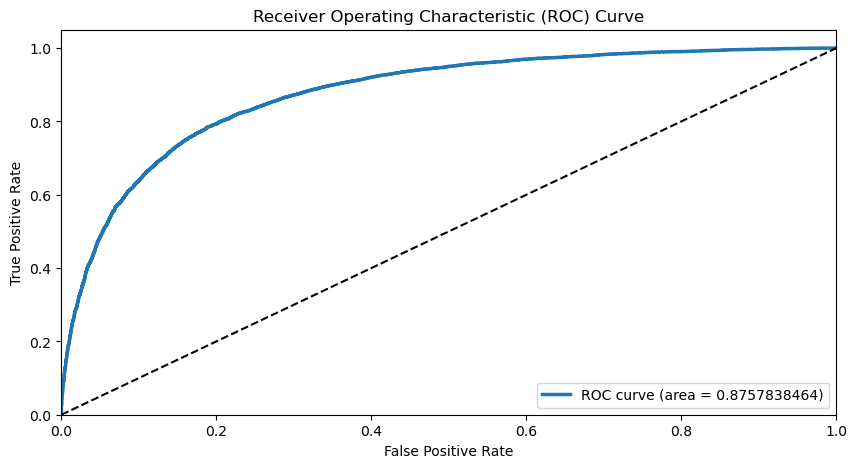

0.8757838464

In [8]:
evaluation.plot_roc(baseline_model, y_test, test_features)

### Baseline with TF-IDF vectors

In [9]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(C=0.0001)

baseline_model.fit(train_features, y_train)
model_predictions = baseline_model.predict(test_features)

accuracy, precision, recall, f1_score = evaluation.get_performance(
    model_predictions, y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.80688
Precision: 0.7791848617176128
Recall: 0.85648
F1 Score: 0.8160060975609755

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.78      0.86      0.82     12500
           0       0.84      0.76      0.80     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000


Prediction Confusion Matrix:
------------------------------
      0      1
0  9466   3034
1  1794  10706


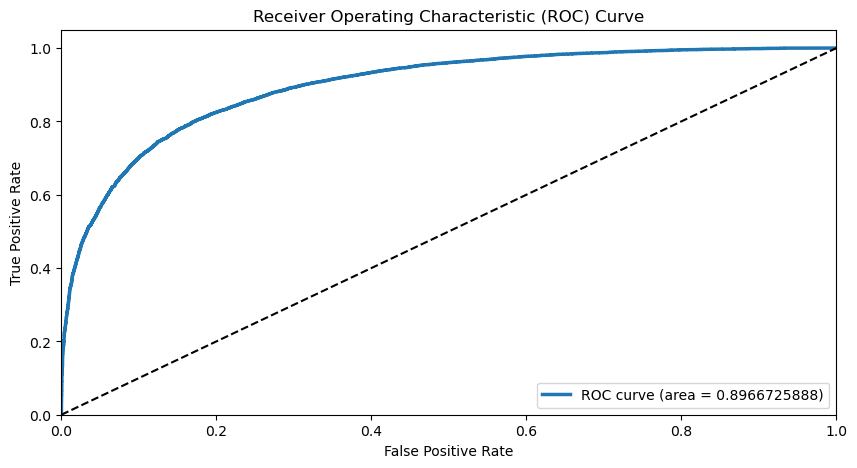

0.8966725888

In [10]:
evaluation.plot_roc(baseline_model, y_test, test_features)

---

## 5. Classifying using K-Means

Let use tfidf features computed in last section as vector inputs for kmeans.

### K-Means with BoW vectors

In [26]:
# TODO Complete in this cell: Train the k-means clustering model using `n_clusters=2`.
# Having the model trained, use it to make predictions on the test dataset.
# Assign the predictions to the variable `kmeans_predictions`, it will be used in the
# following cell to evaluate the model performance.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

kmeans.fit(train_features)
print(f"Converged after {kmeans.n_iter_} iterations")

/home/agvargasb/miniconda3/envs/sprint_5/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Converged after 21 iterations


In [27]:
kmeans_predictions = kmeans.predict(test_features)

In [28]:
kmeans_predictions

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [36]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    kmeans_predictions, y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.49796
Precision: 0.493886358187485
Recall: 0.1648
F1 Score: 0.24713574470637634

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.49      0.16      0.25     12500
           0       0.50      0.83      0.62     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.44     25000
weighted avg       0.50      0.50      0.44     25000


Prediction Confusion Matrix:
------------------------------
       0     1
0  10389  2111
1  10440  2060


In [ ]:
# accuracy, precision, recall, f1_score = evaluation.get_performance(
#     [1 - el for el in kmeans_predictions], y_test
# )

### K-Means with TF-IDF vectors

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

kmeans.fit(train_features)
print(f"Converged after {kmeans.n_iter_} iterations")

/home/agvargasb/miniconda3/envs/sprint_5/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Converged after 24 iterations


In [12]:
kmeans_predictions = kmeans.predict(test_features)

In [13]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    kmeans_predictions, y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.57528
Precision: 0.552835485682201
Recall: 0.78768
F1 Score: 0.6496865720884196

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.55      0.79      0.65     12500
           0       0.63      0.36      0.46     12500

    accuracy                           0.58     25000
   macro avg       0.59      0.58      0.56     25000
weighted avg       0.59      0.58      0.56     25000


Prediction Confusion Matrix:
------------------------------
      0     1
0  4536  7964
1  2654  9846


---
## 6. Feature Engineering with Custom Word Embedding

### Tokenize reviews and train your own Word Embedding

You are going to have to train your own word embedding, for this we are going to use the __gensim__ library. The only requirement we ask of you is that the $vector\_size=100$.

[Here](https://radimrehurek.com/gensim/models/word2vec.html) you can read Gensim's Word2Vec documentation so you can train your own embedding, using the review data as a corpus.

As a previous step to training your word embedding you must tokenize the corpus, this may take a bit depending on the size of the dataset and the tokenizer we use, if you want you can try the NLTK tokenizer called `ToktokTokenizer`, which turns out to be a little faster (we hope that this recommendation does not bias your work, try and use the ones you want)

**Note: Here I don't tokenize the corpus again! That's already done in the normalization step. The results of this step are saved in dataset/norm_train_reviews.txt and dataset/norm_test_reviews.txt. The file corresponding to the train data is passed to the Word2Vec method for training, and it appears that this results in faster training, using 4 workers to process the text file.**

In [29]:
# TODO: Train your Word2Vec model and assign it to `model_w2v`.
# The output model vector size (w2v_vector_size) is set by default to 100,
# you can change it if you want.

w2v_vector_size = 100
model_w2v = Word2Vec(corpus_file=norm_train_path, vector_size=w2v_vector_size, workers=4, epochs=30)

In [ ]:
# model_w2v.save("w2v.model")
# model_w2v = Word2Vec.load("w2v.model")

### Generate averaged word vector features

Once the embedding has been trained, we must use it. Remember that embedding will convert each word you pass to it into a vector of a given dimension (in our case $vector\_size=100$). So in order to obtain a vector for each review, you must average the vectors of all the words that are part of the same review.

The function must have the following form:
* `vectorizer(corpus, model, num_features=100)`


Where:
* `corpus:` corresponds to the entire dataset, in this way we obtain an average vector for each review, with a single call to the function.
* `model:` is your trained model.
* `num_features:` the dimension of the output vector of your embedding (remember that in our case we set this value to 100).

To do this you must complete the `vectorize` function of the `word2vec.py` module.

In [12]:
train_reviews_iterator = word2vec.corpus_iterator(norm_train_path)
test_reviews_iterator = word2vec.corpus_iterator(norm_test_path)

In [30]:
# TODO: Make sure you have completed the `vectorizer()` function from
# word2vec.py module.
# You don't need to change this code, just make it run without errors.

w2v_train_features = word2vec.vectorizer_iter(
    corpus_iter=train_reviews_iterator,
    model=model_w2v
)

w2v_test_features = word2vec.vectorizer_iter(
    corpus_iter=test_reviews_iterator,
    model=model_w2v
)

### Modeling

Finally train a new model, it can be the same one you used before and compare the results you got using BoW/TF-IDF and Word2Vec.

In addition to training the model we ask you to show:

* `Accuracy`
* `Recall`
* `F1-Score`
* `Classification Report`
* `Confusion Matrix`
* `ROC Curve`
* `Obtain the ROC-AUC value (later we will do a small minimum performance check with this value)`

In [31]:
# TODO: Use the `get_performance()` function from `evaluation.py` module to show
# the model performance.

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(C=0.0001)

logistic_model.fit(w2v_train_features, y_train)
logistic_model_predictions = logistic_model.predict(w2v_test_features)

accuracy, precision, recall, f1_score = evaluation.get_performance(
    logistic_model_predictions, y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.7598
Precision: 0.8153218759102826
Recall: 0.67176
F1 Score: 0.7366112548796001

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.82      0.67      0.74     12500
           0       0.72      0.85      0.78     12500

    accuracy                           0.76     25000
   macro avg       0.77      0.76      0.76     25000
weighted avg       0.77      0.76      0.76     25000


Prediction Confusion Matrix:
------------------------------
       0     1
0  10598  1902
1   4103  8397


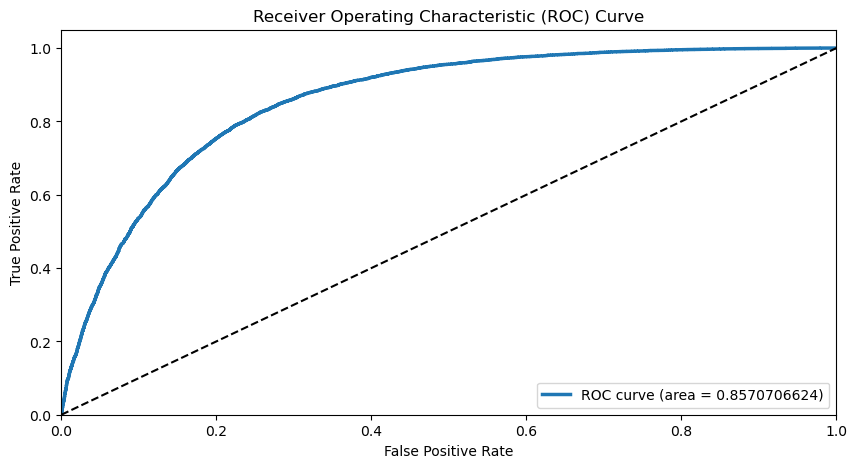

0.8570706624

In [33]:
# TODO: Use the `plot_roc()` function from `evaluation.py` module to show
# the model ROC curve.

evaluation.plot_roc(logistic_model, y_test, w2v_test_features)

## 7. Predict data

- Take your best model
- Take `test data` (i.e. the dataset after doing the preprocessing and feature engineering part)
- Run the data through your model and save the predictions on the `positive` column in the `test` DataFrame (yeah that we've loaded at the very beginning of this notebook).
- You will have to use that model to fill values in the positive column using the model predictions
- Save the modified version of the DataFrame with the name (`dataset/movies_review_predict_aai.csv`) and don't forget to submit it alongside the rest of this sprint project code.

Let's say your best model is called `logistic_word2vec`, then your code should be exactly this:

```python
    from src import config
    from pathlib import Path
    DATASET_TEST_PREDICT = str(Path(config.DATASET_ROOT_PATH) / "movies_review_predict_aai.csv")
    test_preds = logistic_word2vec.predict_proba(w2v_test_features)[:, 1]
    test["positive"] = test_preds
    test.to_csv(DATASET_TEST_PREDICT, index=False)
```

### LightGBM with Word2Vec vectors

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=529)

X = w2v_train_features
y = np.array(y_train)

fold = 0
aucs = []
for train_idx, val_idx in kfold.split(X, y):
    X_tr = X[train_idx]
    y_tr = y[train_idx]
    
    X_valid = X[val_idx]
    y_valid = y[val_idx]

    # Fit Model on Train
    clf = lgb.LGBMClassifier(n_estimators=100,
                             objective='binary',
                             num_leaves=31,
                             learning_rate=0.05)
    clf.fit(X_tr, y_tr)

    pred_prob = clf.predict_proba(X_valid)[:, 1]
    auc_score = roc_auc_score(y_valid, pred_prob)

    print(f"======= Fold {fold} ========")
    print(f"AUC is {auc_score:0.4f}" )
    print(clf.get_params())
    # print(clf.best_iteration_)
    
    fold += 1
    aucs.append(auc_score)

oof_auc = np.mean(aucs)
print(f"======= Out of fold ========")
print(f'Out of fold AUC score is {oof_auc:0.4f}')

[LightGBM] [Info] Number of positive: 10000, number of negative: 10000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
======= Fold 0 ========
AUC is 0.9237
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': 'binary', 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
[LightGBM] [Info] Number of positive: 10000, number of negative: 10000
[LightGBM] [Info] Auto-choosi

In [39]:
lgb_clf_w2v = lgb.LGBMClassifier(n_estimators=100, objective='binary', num_leaves=31, learning_rate=0.05)
lgb_clf_w2v.fit(w2v_train_features, y_train)

[LightGBM] [Info] Number of positive: 12500, number of negative: 12500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 25000, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(learning_rate=0.05, objective='binary')

In [40]:
model_predictions = lgb_clf_w2v.predict(w2v_test_features)

accuracy, precision, recall, f1_score = evaluation.get_performance(
    model_predictions, y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.84488
Precision: 0.8524938675388389
Recall: 0.83408
F1 Score: 0.8431864132632431

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.85      0.83      0.84     12500
           0       0.84      0.86      0.85     12500

    accuracy                           0.84     25000
   macro avg       0.85      0.84      0.84     25000
weighted avg       0.85      0.84      0.84     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10696   1804
1   2074  10426


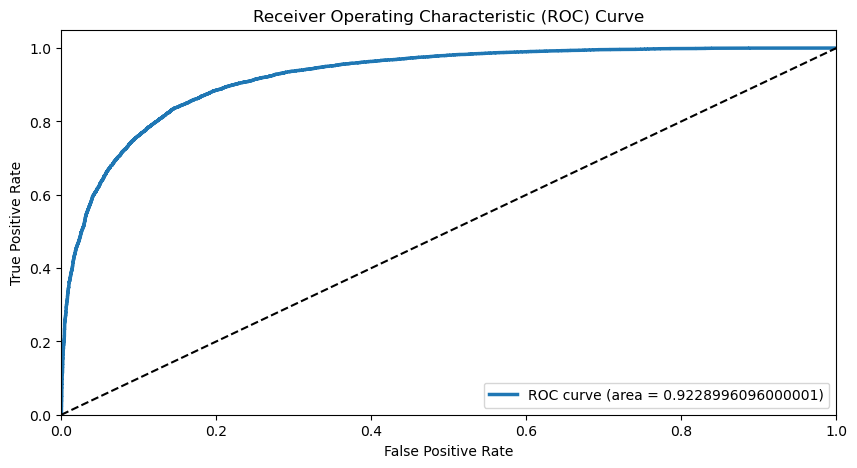

0.9228996096000001

In [41]:
evaluation.plot_roc(lgb_clf_w2v, y_test, w2v_test_features)

### LightGBM with TF-IDF vectors

In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=529)

X = train_features
y = np.array(y_train)

fold = 0
aucs = []
for train_idx, val_idx in kfold.split(X, y):
    X_tr = X[train_idx]
    y_tr = y[train_idx]
    
    X_valid = X[val_idx]
    y_valid = y[val_idx]

    # Fit Model on Train
    clf = lgb.LGBMClassifier(n_estimators=100,
                             objective='binary',
                             num_leaves=31,
                             learning_rate=0.05)
    clf.fit(X_tr, y_tr)

    pred_prob = clf.predict_proba(X_valid)[:, 1]
    auc_score = roc_auc_score(y_valid, pred_prob)

    print(f"======= Fold {fold} ========")
    print(f"AUC is {auc_score:0.4f}" )
    print(clf.get_params())
    # print(clf.best_iteration_)
    
    fold += 1
    aucs.append(auc_score)

oof_auc = np.mean(aucs)
print(f"======= Out of fold ========")
print(f'Out of fold AUC score is {oof_auc:0.4f}')

[LightGBM] [Info] Number of positive: 10000, number of negative: 10000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.062165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 445518
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 10292
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
======= Fold 0 ========
AUC is 0.9151
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': 'binary', 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
[LightGBM] [Info] Number of positive: 10000, number of negative: 10000
[LightGBM] [Info] Auto-cho

In [45]:
lgb_clf_tf_idf = lgb.LGBMClassifier(n_estimators=100, objective='binary', num_leaves=31, learning_rate=0.05)
lgb_clf_tf_idf.fit(train_features, y_train)

[LightGBM] [Info] Number of positive: 12500, number of negative: 12500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 3.271754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 535652
[LightGBM] [Info] Number of data points in the train set: 25000, number of used features: 11892
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(learning_rate=0.05, objective='binary')

In [46]:
model_predictions = lgb_clf_tf_idf.predict(test_features)

accuracy, precision, recall, f1_score = evaluation.get_performance(
    model_predictions, y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.83732
Precision: 0.8267844687282028
Recall: 0.85344
F1 Score: 0.8399007991182142

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.83      0.85      0.84     12500
           0       0.85      0.82      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10265   2235
1   1832  10668


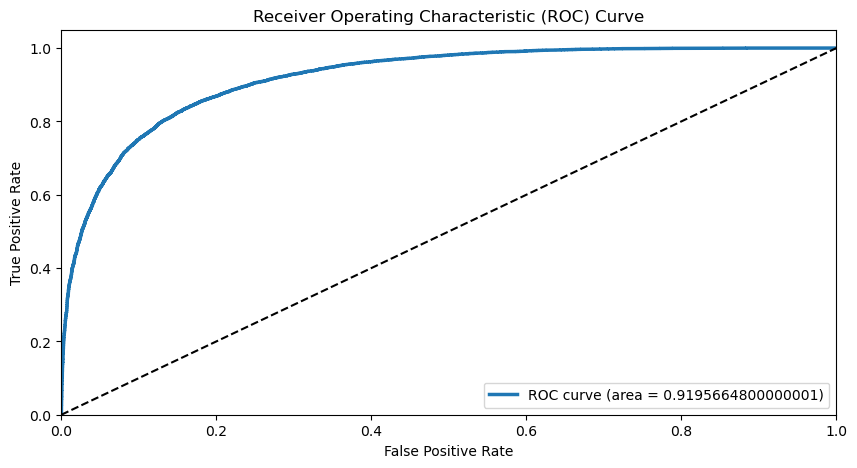

0.9195664800000001

In [47]:
evaluation.plot_roc(lgb_clf_tf_idf, y_test, test_features)

### Best model

The LightGBM based model using Word2Vec vectors is the best.

In [54]:
from src import config
from pathlib import Path

DATASET_TEST_PREDICT = str(Path(config.DATASET_ROOT_PATH) / "movies_review_predict_aai.csv")
test_preds = lgb_clf_w2v.predict_proba(w2v_test_features)[:, 1]
test["positive"] = test_preds
test.to_csv(DATASET_TEST_PREDICT, index=False)

---
### OPTIONAL:

In our case, we train a word embedding from scratch, which is very good at an educational level, but when applying it to a real problem, we need a lot of data (which is not the case with our problem). Therefore, we invite you to investigate and use one of the `pre-trained Word2Vec models`.

If you look for the `Pretrained models` section in this [link](https://radimrehurek.com/gensim/models/word2vec.html), you will find information about the models that Gensim owns.

In [3]:
import gensim.downloader

list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [5]:
google_vectors = gensim.downloader.load('word2vec-google-news-300')

In [8]:
google_vectors['computer'].shape

(300,)

In [6]:
train_reviews_iterator = word2vec.corpus_iterator(norm_train_path)
test_reviews_iterator = word2vec.corpus_iterator(norm_test_path)

In [7]:
pre_w2v_train_features = word2vec.pretrained_vectorizer_iter(
    corpus_iter=train_reviews_iterator,
    vectors=google_vectors
)

pre_w2v_test_features = word2vec.pretrained_vectorizer_iter(
    corpus_iter=test_reviews_iterator,
    vectors=google_vectors
)

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(C=0.0001)

logistic_model.fit(pre_w2v_train_features, y_train)
logistic_model_predictions = logistic_model.predict(pre_w2v_test_features)

accuracy, precision, recall, f1_score = evaluation.get_performance(
    logistic_model_predictions, y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.78276
Precision: 0.800527166057308
Recall: 0.7532
F1 Score: 0.7761427805943695

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.80      0.75      0.78     12500
           0       0.77      0.81      0.79     12500

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000


Prediction Confusion Matrix:
------------------------------
       0     1
0  10154  2346
1   3085  9415


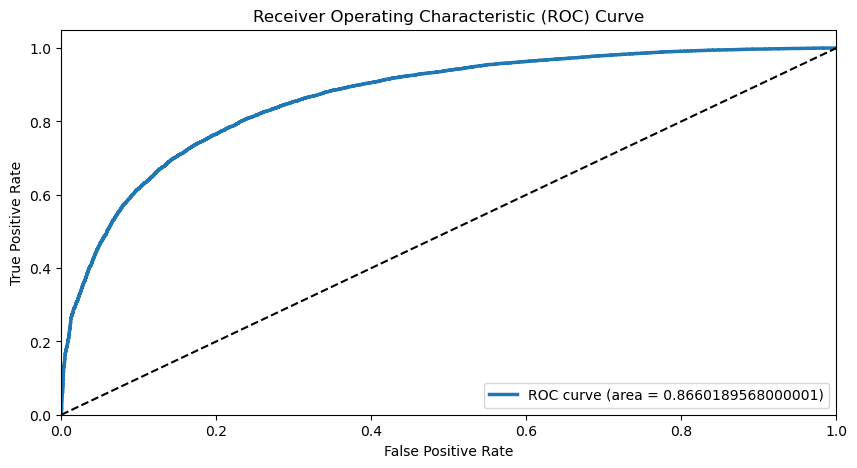

0.8660189568000001

In [13]:
evaluation.plot_roc(logistic_model, y_test, pre_w2v_test_features)